# PERFORMANCE ASSESSMENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import normalized_mutual_info_score,adjusted_rand_score
from sklearn.metrics import homogeneity_score,completeness_score,silhouette_score
from sklearn.cluster import KMeans
from seaborn import heatmap

In [2]:
labels_str = pd.read_csv("data/pbmc_labels_str.csv")
valuelbl = [5, 7, 3, 0, 4, 1, 6, 8, 2]
dictlabels = dict(zip(valuelbl, list(set(labels_str.labels))))

In [3]:
def plot_comparison(df, kmeans, xy, title1, title2):
    groups = df.groupby('label')
    fig, (ax, ax1) = plt.subplots(1,2, figsize=(20,8)) 
    
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=dictlabels[name])
    ax.set_title(title1)
    
    y_kmeans = kmeans.predict(xy)
    ax1.scatter(xy[:, 0], xy[:, 1], c=y_kmeans, s=25, cmap='viridis')
    centers = kmeans.cluster_centers_
    ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    ax1.set_title(title2)
    
    plt.show()

In [4]:
def measure_performance_scores(predicted, true):
    
    NMI = normalized_mutual_info_score(true, predicted)
    RAND = adjusted_rand_score(true, predicted)
    HOMO = homogeneity_score(true, predicted)
    COMPLETENESS = completeness_score(true, predicted)

    return {"NMI": NMI,"RAND":RAND,"HOMOGENEITY":HOMO, "COMPLETENESS":COMPLETENESS}

In [5]:
# Load the data and read the dataframes
file_name_1 = "DF_Deepautoencoder.pkl"
file_name_2 = "DF_BVAE.pkl"
file_name_3 = "DF_BVSC.pkl"

df_DAE = pd.read_pickle(file_name_1)
df_BVAE = pd.read_pickle(file_name_2)
df_BVSC = pd.read_pickle(file_name_3)

# The true classes
TC_DAE = np.asarray(df_DAE.label)
TC_BVAE = np.asarray(df_BVAE.label)
TC_BVSC = np.asarray(df_BVSC.label)

# Converting shapes of data for K-means clustering
X_DAE = np.concatenate((np.vstack(df_DAE.x), np.vstack(df_DAE.y)), axis=1)
X_BVAE = np.concatenate((np.vstack(df_BVAE.x), np.vstack(df_BVAE.y)), axis=1)
X_BVSC = np.concatenate((np.vstack(df_BVSC.x), np.vstack(df_BVSC.y)), axis=1)

# We set number of clusters equal to number of known cell types in the original study
n_clusters = 9
 
# Perform the algorithm for each model outputs
KM_DAE = KMeans(n_clusters, n_init=100).fit(X_DAE)
KM_BVAE = KMeans(n_clusters, n_init=100).fit(X_BVAE)
KM_BVSC = KMeans(n_clusters, n_init=100).fit(X_BVSC)

# The predicted labels based on our KMclustering algorithm 
P_DAE = KM_DAE.labels_
P_BVAE = KM_BVAE.labels_
P_BVSC = KM_BVSC.labels_

In [6]:
print("DAE: ", measure_performance_scores(P_DAE, TC_DAE))
print("BVAE: ", measure_performance_scores(P_BVAE, TC_BVAE))
print("BVSC: ", measure_performance_scores(P_BVSC, TC_BVSC))

DAE:  {'NMI': 0.7208521293324643, 'RAND': 0.5797700403777446, 'HOMOGENEITY': 0.7703669551755775, 'COMPLETENESS': 0.6745198361275988}
BVAE:  {'NMI': 0.609227487112316, 'RAND': 0.4403942322215428, 'HOMOGENEITY': 0.6542970022778212, 'COMPLETENESS': 0.5672624660682608}
BVSC:  {'NMI': 0.645564126107942, 'RAND': 0.46528728435494376, 'HOMOGENEITY': 0.6921344274315764, 'COMPLETENESS': 0.6021273099562883}


/work/modules/Ubuntu/14.04/amd64/common/anaconda3/latest/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [7]:
dict_measures = measure_performance_scores(P_DAE, TC_DAE)

x1 = list(measure_performance_scores(P_DAE, TC_DAE).values())
x2 = list(measure_performance_scores(P_BVAE, TC_BVAE).values())
x3 = list(measure_performance_scores(P_BVSC, TC_BVSC).values())

performance_matrix = np.asarray([x1, x2, x3])

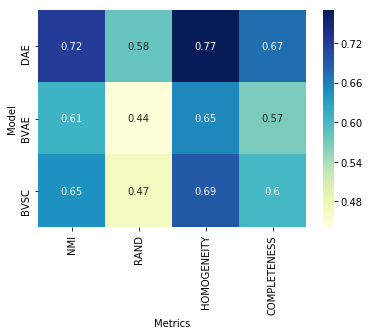

In [8]:
I = pd.Index(["DAE", "BVAE", "BVSC"], name="Model")
C = pd.Index(["NMI", "RAND", "HOMOGENEITY", "COMPLETENESS"], name="Metrics")

performance_table = pd.DataFrame(data = performance_matrix,
                                 index = I,
                                 columns = C)

performance_heatmap = heatmap(performance_table, cmap="YlGnBu", annot=True)

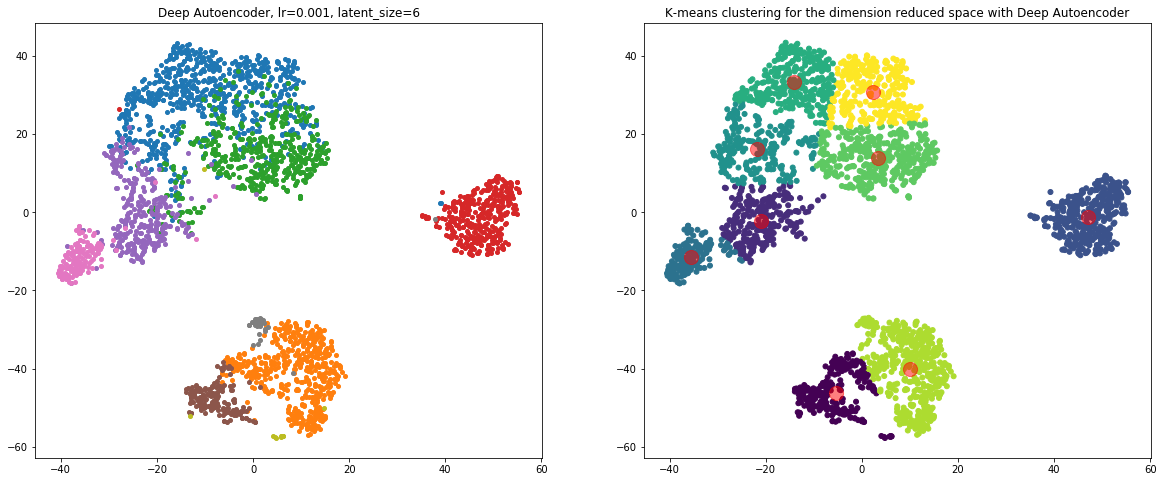

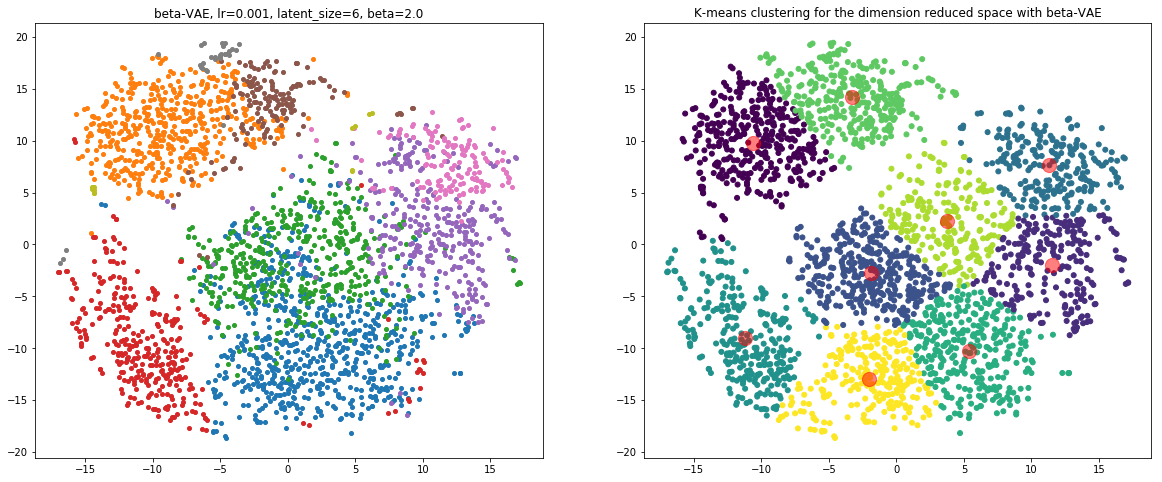

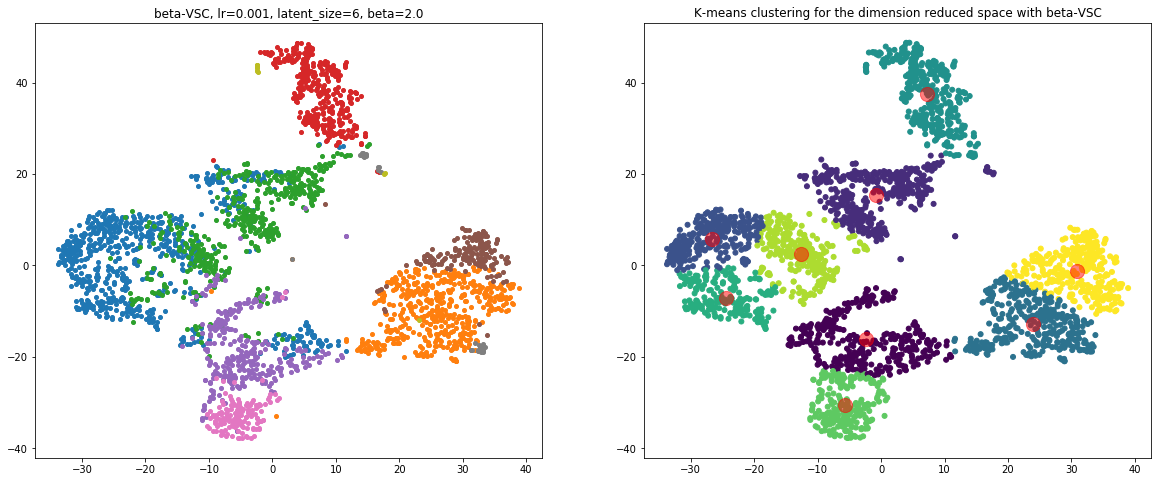

In [9]:
# The visualizations

T1_DAE = 'Deep Autoencoder, lr=0.001, latent_size=6'
T2_DAE = 'K-means clustering for the dimension reduced space with Deep Autoencoder'
plot_comparison(df_DAE, KM_DAE, X_DAE, T1_DAE, T2_DAE)

T1_BVAE = "beta-VAE, lr=0.001, latent_size=6, beta=2.0"
T2_BVAE = 'K-means clustering for the dimension reduced space with beta-VAE'
plot_comparison(df_BVAE, KM_BVAE, X_BVAE, T1_BVAE, T2_BVAE)

T1_BVSC  = "beta-VSC, lr=0.001, latent_size=6, beta=2.0"
T2_BVSC = 'K-means clustering for the dimension reduced space with beta-VSC'
plot_comparison(df_BVSC , KM_BVSC , X_BVSC , T1_BVSC , T2_BVSC)